# TENSORFLOW
O Tensorflow é uma biblioteca criada pela equipe **Google Brain Team** junto com o grupo de pesquisa **Google's Mach Learning Intelligence** com o objetivo de conduzir pesquisas relacionadas as áreas de Aprendizado de Máquina e Aprendizado Profundo.
o TensorFlow combina a álgebra computacional com técnica de otimização, facilitando o cálculo de muitas expressões matemáticas em que o problema é o tempo necessário para executar a computação.


# Conceitos Básicos
* Definir, otimizar e calcular eficientemente expressões matemáticas envolvendo matrizes multidimensionais (tensores)
* Suporte de programação de redes neurais profundas e técnicas de aprendizado de máquina
* Uso transparente da computação em GPU, automatizando o gerenciamento e otimização da mesma memória e dos dados utilizados. O mesmo código pode ser executado em **CPUs** ou **GPUs**. O TensorFlow irá descobrir quais partes do cálculo devem ser movidas para a GPU.
* Alta escalabilidade de computação entre máquinas e grandes conjuntos de dados.


# Como funciona o TensorFlow
Todas as computações no TensorFlow são representadas como um dataflow graph. Esse grafo é composto por dois elementos:
* um conjunto de objetos tf.Operation, que representam as unidades com as operações;
* um conjunto de tf.Tensor, que repreentam as unidades com os dados.

# Tensor
Tensor é um tipo de estrutura de dados que permite armazenar números em matrizes (“arrays”)
de múltiplas dimensões.

- Tensores são amplamente utilizados na área de aprendizado de máquina 

- comum nas RNAs
ter tensores de 5 ou mais dimensões.

- Importância dos tensores nas RNA é tão grande que um dos principais softwares da área é
chamado TensorFlow.

- Biblioteca de funções Numpy foi desenvolvida para trabalhar com tensores.

- Existem inúmeras funções e métodos na biblioteca Numpy para operar com tensores.

## Representação
* Um tensor sem dimenensão é representado pela forma [];
* Um tensor 1D(vetor) é representado pela forma [k];
* Um tensor 2D é representado pela forma [k,m], e assim por diante.

## Exemplo
Considere um lote de 100 imagens coloridas (RGB) e de tamanho 28x28 px. o Tensor que armazenaria esses dados seria do formato [n_lote, n_altura, n_largura, n_cores], ou, em números [100, 28,28,3]


# https://playground.tensorflow.org

# KERAS

O keras é uma ferramenta para desenvolvimento de RNAs deep-learning, baseado na
linguagem Python, que fornece uma forma simples e conveniente de construir, treinar e testar
uma RNA.

A estrutura fundamental das RNAs são as camadas, que recebem como dado de entrada um
tensor e geram como saída outro tensor.

A criação, treinamento e teste de uma RNA com o Keras é feito nas seguintes etapas:

1. Definição dos dados de treinamento e de teste;

2. Configuração da RNA, que consiste na definição das camadas da RNA para realizar o
mapeamento das entradas nas saídas desejadas;

3. Compilação da RNA, que também inclui a configuração do processo de treinamento pela
escolha da função de custo, do otimizador e da métrica para avaliar o desempenho;

4. Treinamento da RNA;

5. Teste e avaliação do desempenho da RNA.

## Dados de treinamento

Nessa etapa os dados de treinamento e teste são organizados em tensores.

Por exemplo:

Em um problema de classificação binária onde os dados de entrada de cada exemplo é um vetor coluna com dimensão (nx, 1), a saída é um escalar e existem m exemplos, então os tensores de entrada e de saída da RNA esperado pelo Keras são os seguintes:


- Dimensão do tensor de entrada (m, nx), ou seja, nesse caso temos que transpor os vetores
de entrada para transformá-los em vetores linha, de forma que quando colocados juntos em
uma matriz, cada linha corresponde à entrada de um exemplo;


- Dimensão do tensor de saída (m, 1), ou seja, o vetor com as saídas é um vetor coluna,
onde cada elemento é a saída esperada de um exemplo

# Configuração da RNA

A estrutura de dados de uma RNA no Keras é chamada de modelo -> um modelo é uma
instância que organiza as camadas da RNA.

- Um modelo seqüencial, ou RNA seqüencial, consiste de um empilhamento de camadas.

- Para podermos usar as funções do Keras devemos antes importá-las para o nosso ambiente de
programação, da seguinte forma:

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation

Esses dois comandos importam a estrutura de modelo seqüencial e as camadas do tipo
totalmente conectadas (densa) e as funções de ativação.

Uma RNA seqüencial pode ser criada simplesmente passando uma lista de instâncias de
camadas para o construtor do Keras, da seguinte forma:

In [0]:
model = Sequential([
  Dense(32, input_shape=(1024,)),
  Activation('relu'),
  Dense(1),
  Activation('sigmoid'),
])

Esse comando define uma RNA de uma camada intermediária e uma camada de saída com
as seguintes características:

-  Os dados de entrada de cada exemplo de treinamento são vetores linha de dimensão
(1024);

-  Observa-se que não é incluída a dimensão do segundo eixo do tensor de entrada no
argumento input_shape, porque nesse momento não se conhece o número de
exemplos que serão usados no treinamento;

- A camada escondida é do tipo densa (totalmente conectada), possui 32 neurônios e a
sua função de ativação é Relu;

-  A camada de saída é do tipo densa (totalmente conectada), possui 1 único neurônio e a
sua função de ativação é sigmóide

A mesma RNA poderia também ser criada em etapas usando comandos para adicionar uma
camada por vez, usando o método .add(), como segue:

In [0]:
from keras import models
from keras import layers
rna = models.Sequential()
rna.add(layers.Dense(units=32, activation='relu', input_dim=1024))
rna.add(layers.Dense(units=1, activation='sigmoid'))

Nesse caso o nome dado ao modelo é rna.

- Nesse caso no lugar de importar somente a estrutura de modelo seqüencial, o primeiro
comando importa do Keras todos os tipos de modelos.

- O segundo comando importa do Keras todos os tipos de camadas, no lugar de somente as
camadas do tipo densa, como feito anteriormente.

- O terceiro comando cria a instância da RNA usando um modelo sequencial.

- O quarto comando adiciona a primeira camada da RNA do tipo densa, com 32 neurônios,
com função de ativação Relu, cuja entrada é um vetor linha de dimensão (1024).

- O quinto comando adiciona uma segunda camada tipo densa, com um único neurônio, com
função de ativação sigmóide.

# Dimensão dos dados de Entrada

A RNA precisa saber as dimensões dos dados de entrada, por essa razão a primeira camada
em um modelo seqüencial precisa receber a informação sobre as dimensões dos eixos dos
dados de entrada.


- Observa-se que somente a primeira camada precisa dessa informação -> o Keras
automaticamente infere as dimensões dos dados de entrada das outras camadas da RNA usando
a informação dos números de neurônios de cada camada.

- Existem diversas formas para definir a dimensão dos dados de entrada da RNA:

- Passando o argumento input_shape para a primeira camada. Esse argumento é uma tuple
de inteiros ou simplesmente None, onde None indica que qualquer número inteiro positivo
pode ser esperado;

- No argumento input_shape o número de exemplos não é incluído  o Keras infere
esse número automaticamente a partir dos dados de entrada fornecidos;

- Algumas camadas 2D, tais com as densas, suportam a especificação dos dados de entrada
também via argumento input_dim.

In [0]:
rna = models.Sequential()
rna.add(Dense(32, input_shape=(1024,)))

In [0]:
rna = models.Sequential()
rna.add(layers.Dense(32, input_dim=1024))

O desenvolvimento de uma RNA exige muitas iterações até se obter um resultado desejável,
assim, para evitar executar inúmeras vezes os mesmos comandos de configuração de uma RNA,
que podem ser muitos dependendo do tamanho da RNA, pode-se criar uma função para
configurar a RNA. Para isso temos, por exemplo, a seguinte função:

In [0]:
def build_model(data_shape):
  rna = models.Sequential()
  rna.add(layers.Dense(units=64, activation='relu',
  input_shape=data_shape))
  rna.add(layers.Dense(units=32, activation='relu'))
  rna.add(layers.Dense(units=1, activation='sigmoid'))
  return rna

# Visualização da RNA configurada

Para visualizar a arquitetura de uma RNA que foi criada usa-se no Keras o método summary(),
com segue:

In [0]:
data_shape = (12288,)
rna = build_model(data_shape)
rna.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                786496    
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 788,609
Trainable params: 788,609
Non-trainable params: 0
_________________________________________________________________


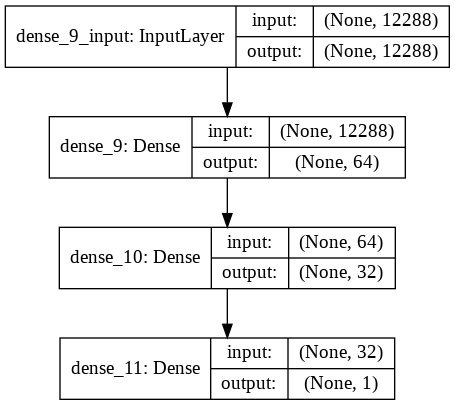

In [0]:
from keras.utils import plot_model
import pydot
plot_model(rna, to_file='rna.png', show_shapes=True)

# Compilação


A geração da RNA é realizada na etapa de compilação, onde é escolhida a função de custo,
uma métrica para avaliação da RNA e configurado o método de treinamento.

-> Um exemplo simples de compilação de uma RNA é o seguinte:

In [0]:
from keras import optimizers
rna.compile(optimizer='SGD', loss='binary_crossentropy',
metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


- O primeiro comando importa do Keras os otimizadores.
- O segundo comando gera e compila a RNA definindo o seguinte:
- Método de otimização -> gradiente descendente;
- Função de custo -> função logística, também chamada de entropia cruzada binária;
- Métrica -> exatidão (veremos isso com detalhes nas próximas aulas).

# Salvar uma RNA treinada

Após desenvolvermos uma RNA podemos salvá-la em um arquivo para podemos utilizá-la
posteriormente.

- Podemos salvar somente a arquitetura da rede, ou somente seus parâmetros, ou ainda a
arquitetura e seus parâmetros.

# Salvando uma RNA completa

Para salvar uma RNA desenvolvida com o Keras usamos o método
save(file_path_and_name) -> nesse caso a RNA é salva em um arquivo no formato
HDF5 que contém:

- A arquitetura da RNA;
- Os parâmetros da RNA;
- Os parâmetros do otimizador usado para treinar a RNA;
- O estado do otimizador para permitir continuar o treinamento exatamente de onde parou.

Tendo uma RNA salva em um arquivo do formato HDF5 podemos usar o método
load_model(file_path_and_name) para restabelecer a RNA da mesma forma que era
quando foi salva.

- Um exemplo de uso desses dois métodos é o seguinte:

In [0]:
# Importa função do Keras para salvar modelos e biblioteca para manipular arquivos no formato HDF5
from keras.models import load_model
import h5py
# Salva RNA e cria um arquivo formato HDF5 de nome RNA.h5 no diretório corrente
rna.save('RNA.h5') # RNA.h5 é o nome do arquivo onde a rna é salva
# Apaga a rna existente
del rna
# Recupera a rna do arquivo RNA.h5
rna = load_model('RNA.h5')

Using TensorFlow backend.


NameError: ignored